<a href="https://colab.research.google.com/github/AdrianArguello/recurrencia-del-cancer-de-vejiga/blob/main/Recurrencia_del_C%C3%A1ncer_de_vejiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


 Estadistica/
 estimador de Nelson-Aalen

In [3]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 9.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=bab6c05dde10d95d97e8fd14d34b264b7f6b4f2eb6ad49dd35ada5ccdb0de74e
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [4]:
from lifelines import NelsonAalenFitter
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("//bladder1.csv")
df.head()

,Unnamed: 0,id,treatment,number,size,recur,start,stop,status,rtumor,rsize,enum
0,1,1,placebo,1,1,0,0,0,3,.,.,1
1,2,2,placebo,1,3,0,0,1,3,.,.,1
2,3,3,placebo,2,1,0,0,4,0,.,.,1
3,4,4,placebo,1,1,0,0,7,0,.,.,1
4,5,5,placebo,5,1,0,0,10,3,.,.,1


Análisis de eventos recurrentes

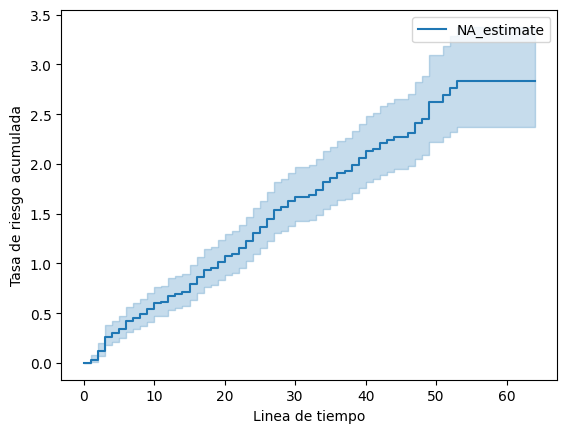

In [7]:
fitter = NelsonAalenFitter()
fitter.fit(df['stop'], event_observed=(df['status'] == 1), entry=df['start'])

fitter.plot_cumulative_hazard()
plt.xlabel('Linea de tiempo')
plt.ylabel('Tasa de riesgo acumulada')
plt.show()

Observamos que la tasa de riesgo acumulada permanece relativamente constante en aproximadamente 2,83. Esto indica que el riesgo de recurrencias o muertes por enfermedad de la vejiga se mantiene constante después de este tiempo.

Distribución del tratamiento empleado

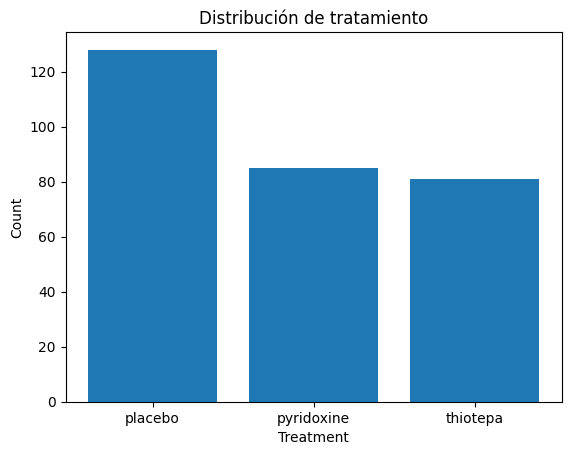

In [9]:
treatment_counts = df['treatment'].value_counts()

plt.bar(treatment_counts.index, treatment_counts.values)
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.title('Distribución de tratamiento')
plt.show()

Tamaño tumoral inicial versus número de recurrencias

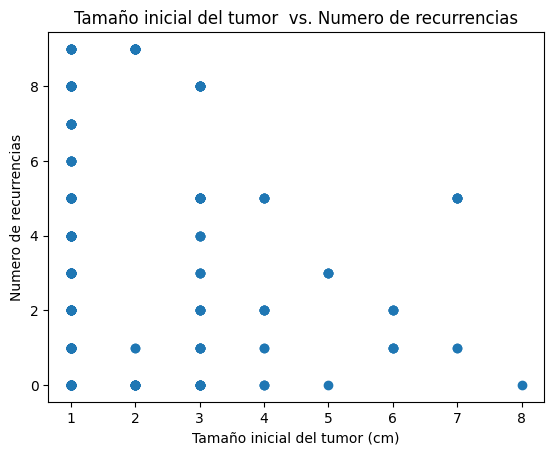

In [10]:
plt.scatter(df['size'], df['recur'])
plt.xlabel('Tamaño inicial del tumor (cm)')
plt.ylabel('Numero de recurrencias')
plt.title('Tamaño inicial del tumor  vs. Numero de recurrencias')
plt.show()

Estado de recurrencia

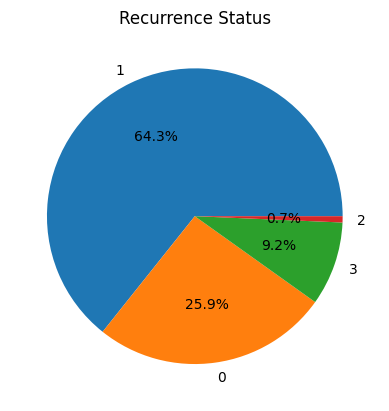

In [11]:
status_counts = df['status'].value_counts()

plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Recurrence Status')
plt.show()